In [190]:
import pandas as pd
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt

In [171]:
val_df = pd.read_csv('../data/test.csv')
val_df.head()

,Unnamed: 0,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region,has_mask,invalid
0,226,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,False,True
1,8521,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False
2,9336,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False
3,5931,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,False,True
4,9323,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False


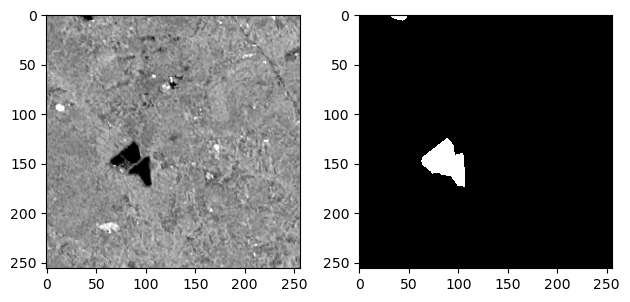

In [238]:
from torchvision.transforms import functional as TF
from torchvision import transforms as T
import torch
import numpy as np

idx = np.random.randint(val_df.shape[0])
img = imread(val_df.loc[idx]['vv_image_path'], as_gray=True)
mask = imread(val_df.loc[idx]['flood_label_path'], as_gray=True)

img = np.stack((img, img, img), axis=2)
_, ax = plt.subplots(1,2)
imshow(img, ax=ax[0])
imshow(mask, ax=ax[1], cmap='gray')

In [239]:
transforms = T.Compose([
    T.RandomHorizontalFlip(0.5),
    T.RandomApply([
        T.RandomRotation([-90,90], fill=(1,1,1,0))
        ], 0.5),
    T.RandomApply([
        T.ElasticTransform(alpha=120.0, sigma=120 * 0.05, fill=(1,1,1,0))
        ], 0.4)
])

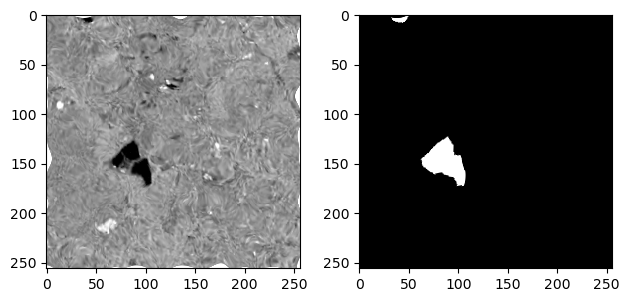

In [240]:
img_t = TF.to_tensor(img)
mask_t = TF.to_tensor(mask)
to_T = torch.cat([img_t, mask_t])

transformed = transforms(to_T)
img_Transformed = np.array(transformed[:3,:,:]).transpose(1,2,0)
mask_Transformed = np.array(transformed[3,:,:])

_, ax = plt.subplots(1,2)
imshow(img_Transformed, ax=ax[0])
imshow(mask_Transformed, ax=ax[1])